In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark example2').getOrCreate() #chaining

# RDD에서 다룰 수 있는 데이터 타입 TypeSafe
1. 비정형 데이터 - ... json, txt, str
2. 정형 데이터 - 리스트, csv, table

In [4]:
# RDD[str]
rdd1 = spark.sparkContext.textFile('learning_spark_data/log.txt')
rdd1

learning_spark_data/log.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [5]:
rdd1.take(3)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS',
 '2025-07-31 10:05:43 WARN User=lee ACTION=DOWNLOAD RESULT=FAIL',
 '2025-07-31 10:08:22 INFO User=park ACTION=UPLOAD RESULT=SUCCESS']

In [6]:
# RDD[dict] - data.json

In [7]:
import json 
rdd2 = spark.sparkContext.textFile('learning_spark_data/data.json').map(json.loads)
rdd2

PythonRDD[5] at RDD at PythonRDD.scala:53

In [8]:
rdd2.take(3)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'}]

In [16]:
spark.stop()

# RDD의 데이터 읽기 패턴
2. RDD 생성 - type 지정 x
3. 형식 변환 - map()
4. take(n)

# 스파크컨텍스트 객체
1. SparkSession.getOrCreate() => 세션객체로부터 사진에 설정된 변수에 밎춰 컨텍스트 생성
2. SparkConf + SparkContext => 저수준 연산에 적합한 방식

In [17]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster('local').setAppName('country-student-counts2')
conf

In [21]:
spark = SparkContext(conf = conf).getOrCreate()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=country-student-counts2, master=local) created by __init__ at /tmp/ipykernel_15217/1936753039.py:1 

In [23]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.submitTime', '1754023211005'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.name', 'country-student-counts2'),


In [24]:
spark.stop()

In [26]:
import os 
os.getcwd() #컨테이너 내부 경로

'/home/jovyan/work'

In [27]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [29]:
filename = 'xAPI-Edu-Data.csv'
filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

## 외부저장소에서 데이터를 로드, RDD 생성

In [94]:
spark = SparkContext(conf = conf).getOrCreate()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=country-student-counts2, master=local) created by __init__ at /tmp/ipykernel_15217/4088782639.py:1 

In [33]:
lines = spark.textFile('file:///'+filepath.replace('\\','/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [34]:
lines.take(5)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L']

In [36]:
lines.count() # 대용량일 경우 문제 -> take(n)

481

# 데이터의 처리

In [37]:
header = lines.first()
header

'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class'

In [39]:
datas = lines.filter(lambda row: row != header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [40]:
countries = datas.map(lambda row: row.split(',')[2])
countries

PythonRDD[8] at RDD at PythonRDD.scala:53

In [41]:
countries.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [42]:
result = countries.countByValue()
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [43]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [46]:
sorted(result.items(), key = lambda x: x[1], reverse = True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [50]:
total = sum(result.values()) #480명
total

480

In [51]:
# 비율 계산
ratios = {k: round(v / total * 100, 2) for k, v in result.items()}
ratios

{'KuwaIT': 37.5,
 'lebanon': 3.96,
 'Egypt': 1.88,
 'SaudiArabia': 3.33,
 'USA': 3.33,
 'Jordan': 36.67,
 'venzuela': 0.21,
 'Iran': 1.25,
 'Tunis': 1.88,
 'Morocco': 0.83,
 'Syria': 1.25,
 'Iraq': 4.58,
 'Palestine': 2.08,
 'Lybia': 1.25}

<BarContainer object of 14 artists>

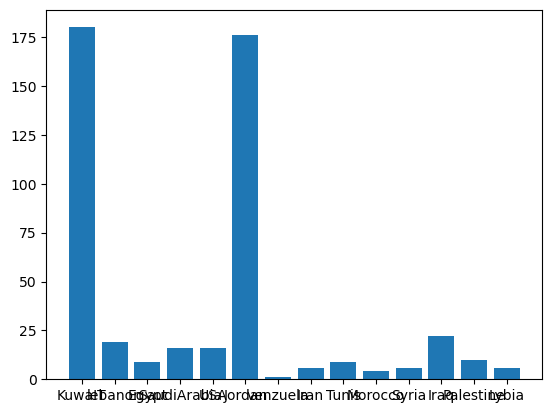

In [52]:
import matplotlib.pyplot as plt
countries = list(result.keys())
counts = list(result.values())
plt.bar(countries, counts)

In [83]:
spark.stop()

# RDD 연습

In [56]:
# 2. RDD 생성 - 기본 리스트
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

In [84]:
spark = SparkContext(conf = conf).getOrCreate()

In [85]:
rdd = spark.parallelize(data)

In [96]:
# 소문자로 변환: Lower()
countries_lower= rdd.map(lambda s: s.lower())
countries_lower

PythonRDD[14] at RDD at PythonRDD.scala:53

In [97]:
countries_lower.collect()

['kuwait',
 'lebanon',
 'jordan',
 'jordan',
 'usa',
 'egypt',
 'jordan',
 'usa',
 'iran',
 'iran',
 'kuwait']

In [88]:
# jordan 추출

In [98]:
jordan_only = countries_lower.filter(lambda s: s == "jordan")
jordan_only.collect()

['jordan', 'jordan', 'jordan']

In [90]:
jordan_only.count()

3

In [91]:
# 몇개국인지 세어보기: distinct() -> count()

In [99]:
distinct_count = countries_lower.distinct().count()
distinct_count

6

In [100]:
distinct_countries = countries_lower.distinct().collect()
distinct_countries

['kuwait', 'lebanon', 'jordan', 'usa', 'egypt', 'iran']

In [95]:
# 국가별 빈도수

In [102]:
data

['KuwaIT',
 'lebanon',
 'Jordan',
 'Jordan',
 'USA',
 'Egypt',
 'Jordan',
 'USA',
 'Iran',
 'Iran',
 'KuwaIT']

In [103]:
country_pairs = countries_lower.map(lambda x: (x, 1))
country_pairs.take(1)

[('kuwait', 1)]

In [104]:
country_counts = country_pairs.reduceByKey(lambda a, b: a+b)
country_counts.take(2)

[('kuwait', 2), ('lebanon', 1)]

In [105]:
country_counts.take(6)

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [106]:
country_counts.collect()

[('kuwait', 2),
 ('lebanon', 1),
 ('jordan', 3),
 ('usa', 2),
 ('egypt', 1),
 ('iran', 2)]

In [107]:
country_counts.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [114]:
country_counts.sortBy(lambda x: x[1], ascending = False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [117]:
rdd.reduce(lambda a, b: a+','+b) # 변환

'KuwaIT,lebanon,Jordan,Jordan,USA,Egypt,Jordan,USA,Iran,Iran,KuwaIT'

In [118]:
# 저장소에 저장하기

In [119]:
output_path = 'output/countries_result'

In [120]:
rdd.saveAsTextFile(output_path) # 저장소 경로

In [121]:
import shutil

In [122]:
if os.path.exists(output_path):
    shutil.rmtree(output_path)
rdd.saveAsTextFile(output_path) # 저장소 경로

In [123]:
spark.stop()

# mnms data

In [125]:
filename = 'mnm_dataset.csv'
filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/mnm_dataset.csv'

In [126]:
spark = SparkContext(conf = conf).getOrCreate()

In [127]:
lines = spark.textFile('file:///'+filepath.replace('\\','/'))
lines

file:////home/jovyan/work/learning_spark_data/mnm_dataset.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [128]:
lines.take(5)

['State,Color,Count', 'TX,Red,20', 'NV,Blue,66', 'CO,Blue,79', 'OR,Blue,71']

In [129]:
lines.count()

100000

## 데이터의 처리

In [130]:
header = lines.first()
header

'State,Color,Count'

In [131]:
datas = lines.filter(lambda row: row != header)
datas.take(3)

['TX,Red,20', 'NV,Blue,66', 'CO,Blue,79']

In [132]:
states = datas.map(lambda row: row.split(',')[2])
states

PythonRDD[6] at RDD at PythonRDD.scala:53

## RDD 연습

In [135]:
rdd = spark.parallelize(data)

In [136]:
distinct_count = states.distinct().count()
distinct_count

91